# Health Claims

In [18]:
import pandas as pd
import numpy as np
import pickle
import string
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,savefig
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [19]:
df = pd.read_excel('../Data/data/Foodmaestro- Health Claim Data .xlsx')
df.head()

,FM Data - Health Claims
0,Bones: Vitamin D supports normal bones
1,Bones: Vitamin D supports the maintenance of...
2,Brain: DHA supports normal brain function
3,Calcium & Vitamin D support normal bones
4,DHA supports normal brain function


### Determine if there are missing values

In [20]:
for col in df.columns:
    print(col, df[col].isnull().sum())

FM Data - Health Claims  0


### Expanding Contractions

In [21]:
df['no_contract'] = df['FM Data - Health Claims '].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,FM Data - Health Claims,no_contract
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]"


In [22]:
# Convert to string
df['FM Data - Health Claims_str'] = [' '.join(map(str, l)) for l in df['no_contract']] 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function


### Tokenization

In [23]:
df['tokenized'] = df['FM Data - Health Claims_str'].apply(word_tokenize) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct..."
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]"


### Converting all Characters to Lowercase

In [24]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x]) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct..."
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]"


### Removing Punctuations

In [25]:
punc = string.punctuation
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]"


### Removing Stopwords

In [26]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]"


### Stemming and Lemmatization

In [27]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)..."
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor..."
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ..."
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br..."


In [28]:
# Convert to wordnet’s format

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor..."
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,..."
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no..."
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,..."


In [29]:
# Lemmatization
wnl = WordNetLemmatizer() 
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x]) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor...","[bone, vitamin, support, normal, bone]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai...","[bone, vitamin, support, maintenance, normal, ..."
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,...","[brain, dha, support, normal, brain, function]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no...","[calcium, vitamin, support, normal, bone]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,...","[dha, support, normal, brain, function]"


In [30]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor...","[bone, vitamin, support, normal, bone]",bone vitamin support normal bone
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai...","[bone, vitamin, support, maintenance, normal, ...",bone vitamin support maintenance normal bone
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,...","[brain, dha, support, normal, brain, function]",brain dha support normal brain function
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no...","[calcium, vitamin, support, normal, bone]",calcium vitamin support normal bone
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,...","[dha, support, normal, brain, function]",dha support normal brain function


In [31]:
df['tags'] = df['pos_tags'].apply(lambda x: [tag for (word, tag) in x]) 
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,tags
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor...","[bone, vitamin, support, normal, bone]",bone vitamin support normal bone,"[NNS, NNS, NNS, JJ, NNS]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai...","[bone, vitamin, support, maintenance, normal, ...",bone vitamin support maintenance normal bone,"[NNS, NNS, NNS, NN, JJ, NNS]"
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,...","[brain, dha, support, normal, brain, function]",brain dha support normal brain function,"[NN, NN, NNS, JJ, NN, NN]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no...","[calcium, vitamin, support, normal, bone]",calcium vitamin support normal bone,"[NN, JJ, NN, JJ, NNS]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,...","[dha, support, normal, brain, function]",dha support normal brain function,"[NN, NNS, JJ, NN, NN]"


In [32]:
output = open('../cleaning data.pkl','wb')
pickle.dump(df,output)

### Word frequency analysis

In [33]:
with open('../cleaning data.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)
df.head()

,FM Data - Health Claims,no_contract,FM Data - Health Claims_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,tags
0,Bones: Vitamin D supports normal bones,"[Bones:, Vitamin, D, supports, normal, bones]",Bones: Vitamin D supports normal bones,"[Bones, :, Vitamin, D, supports, normal, bones]","[bones, :, vitamin, d, supports, normal, bones]","[bones, vitamin, d, supports, normal, bones]","[bones, vitamin, supports, normal, bones]","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (nor...","[bone, vitamin, support, normal, bone]",bone vitamin support normal bone,"[NNS, NNS, NNS, JJ, NNS]"
1,Bones: Vitamin D supports the maintenance of...,"[Bones:, Vitamin, D, supports, the, maintenanc...",Bones: Vitamin D supports the maintenance of n...,"[Bones, :, Vitamin, D, supports, the, maintena...","[bones, :, vitamin, d, supports, the, maintena...","[bones, vitamin, d, supports, the, maintenance...","[bones, vitamin, supports, maintenance, normal...","[(bones, NNS), (vitamin, NNS), (supports, NNS)...","[(bones, n), (vitamin, n), (supports, n), (mai...","[bone, vitamin, support, maintenance, normal, ...",bone vitamin support maintenance normal bone,"[NNS, NNS, NNS, NN, JJ, NNS]"
2,Brain: DHA supports normal brain function,"[Brain:, DHA, supports, normal, brain, function]",Brain: DHA supports normal brain function,"[Brain, :, DHA, supports, normal, brain, funct...","[brain, :, dha, supports, normal, brain, funct...","[brain, dha, supports, normal, brain, function]","[brain, dha, supports, normal, brain, function]","[(brain, NN), (dha, NN), (supports, NNS), (nor...","[(brain, n), (dha, n), (supports, n), (normal,...","[brain, dha, support, normal, brain, function]",brain dha support normal brain function,"[NN, NN, NNS, JJ, NN, NN]"
3,Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]",Calcium & Vitamin D support normal bones,"[Calcium, &, Vitamin, D, support, normal, bones]","[calcium, &, vitamin, d, support, normal, bones]","[calcium, vitamin, d, support, normal, bones]","[calcium, vitamin, support, normal, bones]","[(calcium, NN), (vitamin, JJ), (support, NN), ...","[(calcium, n), (vitamin, a), (support, n), (no...","[calcium, vitamin, support, normal, bone]",calcium vitamin support normal bone,"[NN, JJ, NN, JJ, NNS]"
4,DHA supports normal brain function,"[DHA, supports, normal, brain, function]",DHA supports normal brain function,"[DHA, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[dha, supports, normal, brain, function]","[(dha, NN), (supports, NNS), (normal, JJ), (br...","[(dha, n), (supports, n), (normal, a), (brain,...","[dha, support, normal, brain, function]",dha support normal brain function,"[NN, NNS, JJ, NN, NN]"


### Words with the top 10 frequency

In [34]:
# Get a list of words
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

In [35]:
mostcommon_word = nltk.FreqDist(allwords).most_common(10)
print(mostcommon_word)

[('normal', 2405), ('vitamin', 2352), ('contribute', 1683), ('help', 1203), ('function', 1060), ('c', 766), ('system', 759), ('bone', 748), ('support', 690), ('maintenance', 678)]


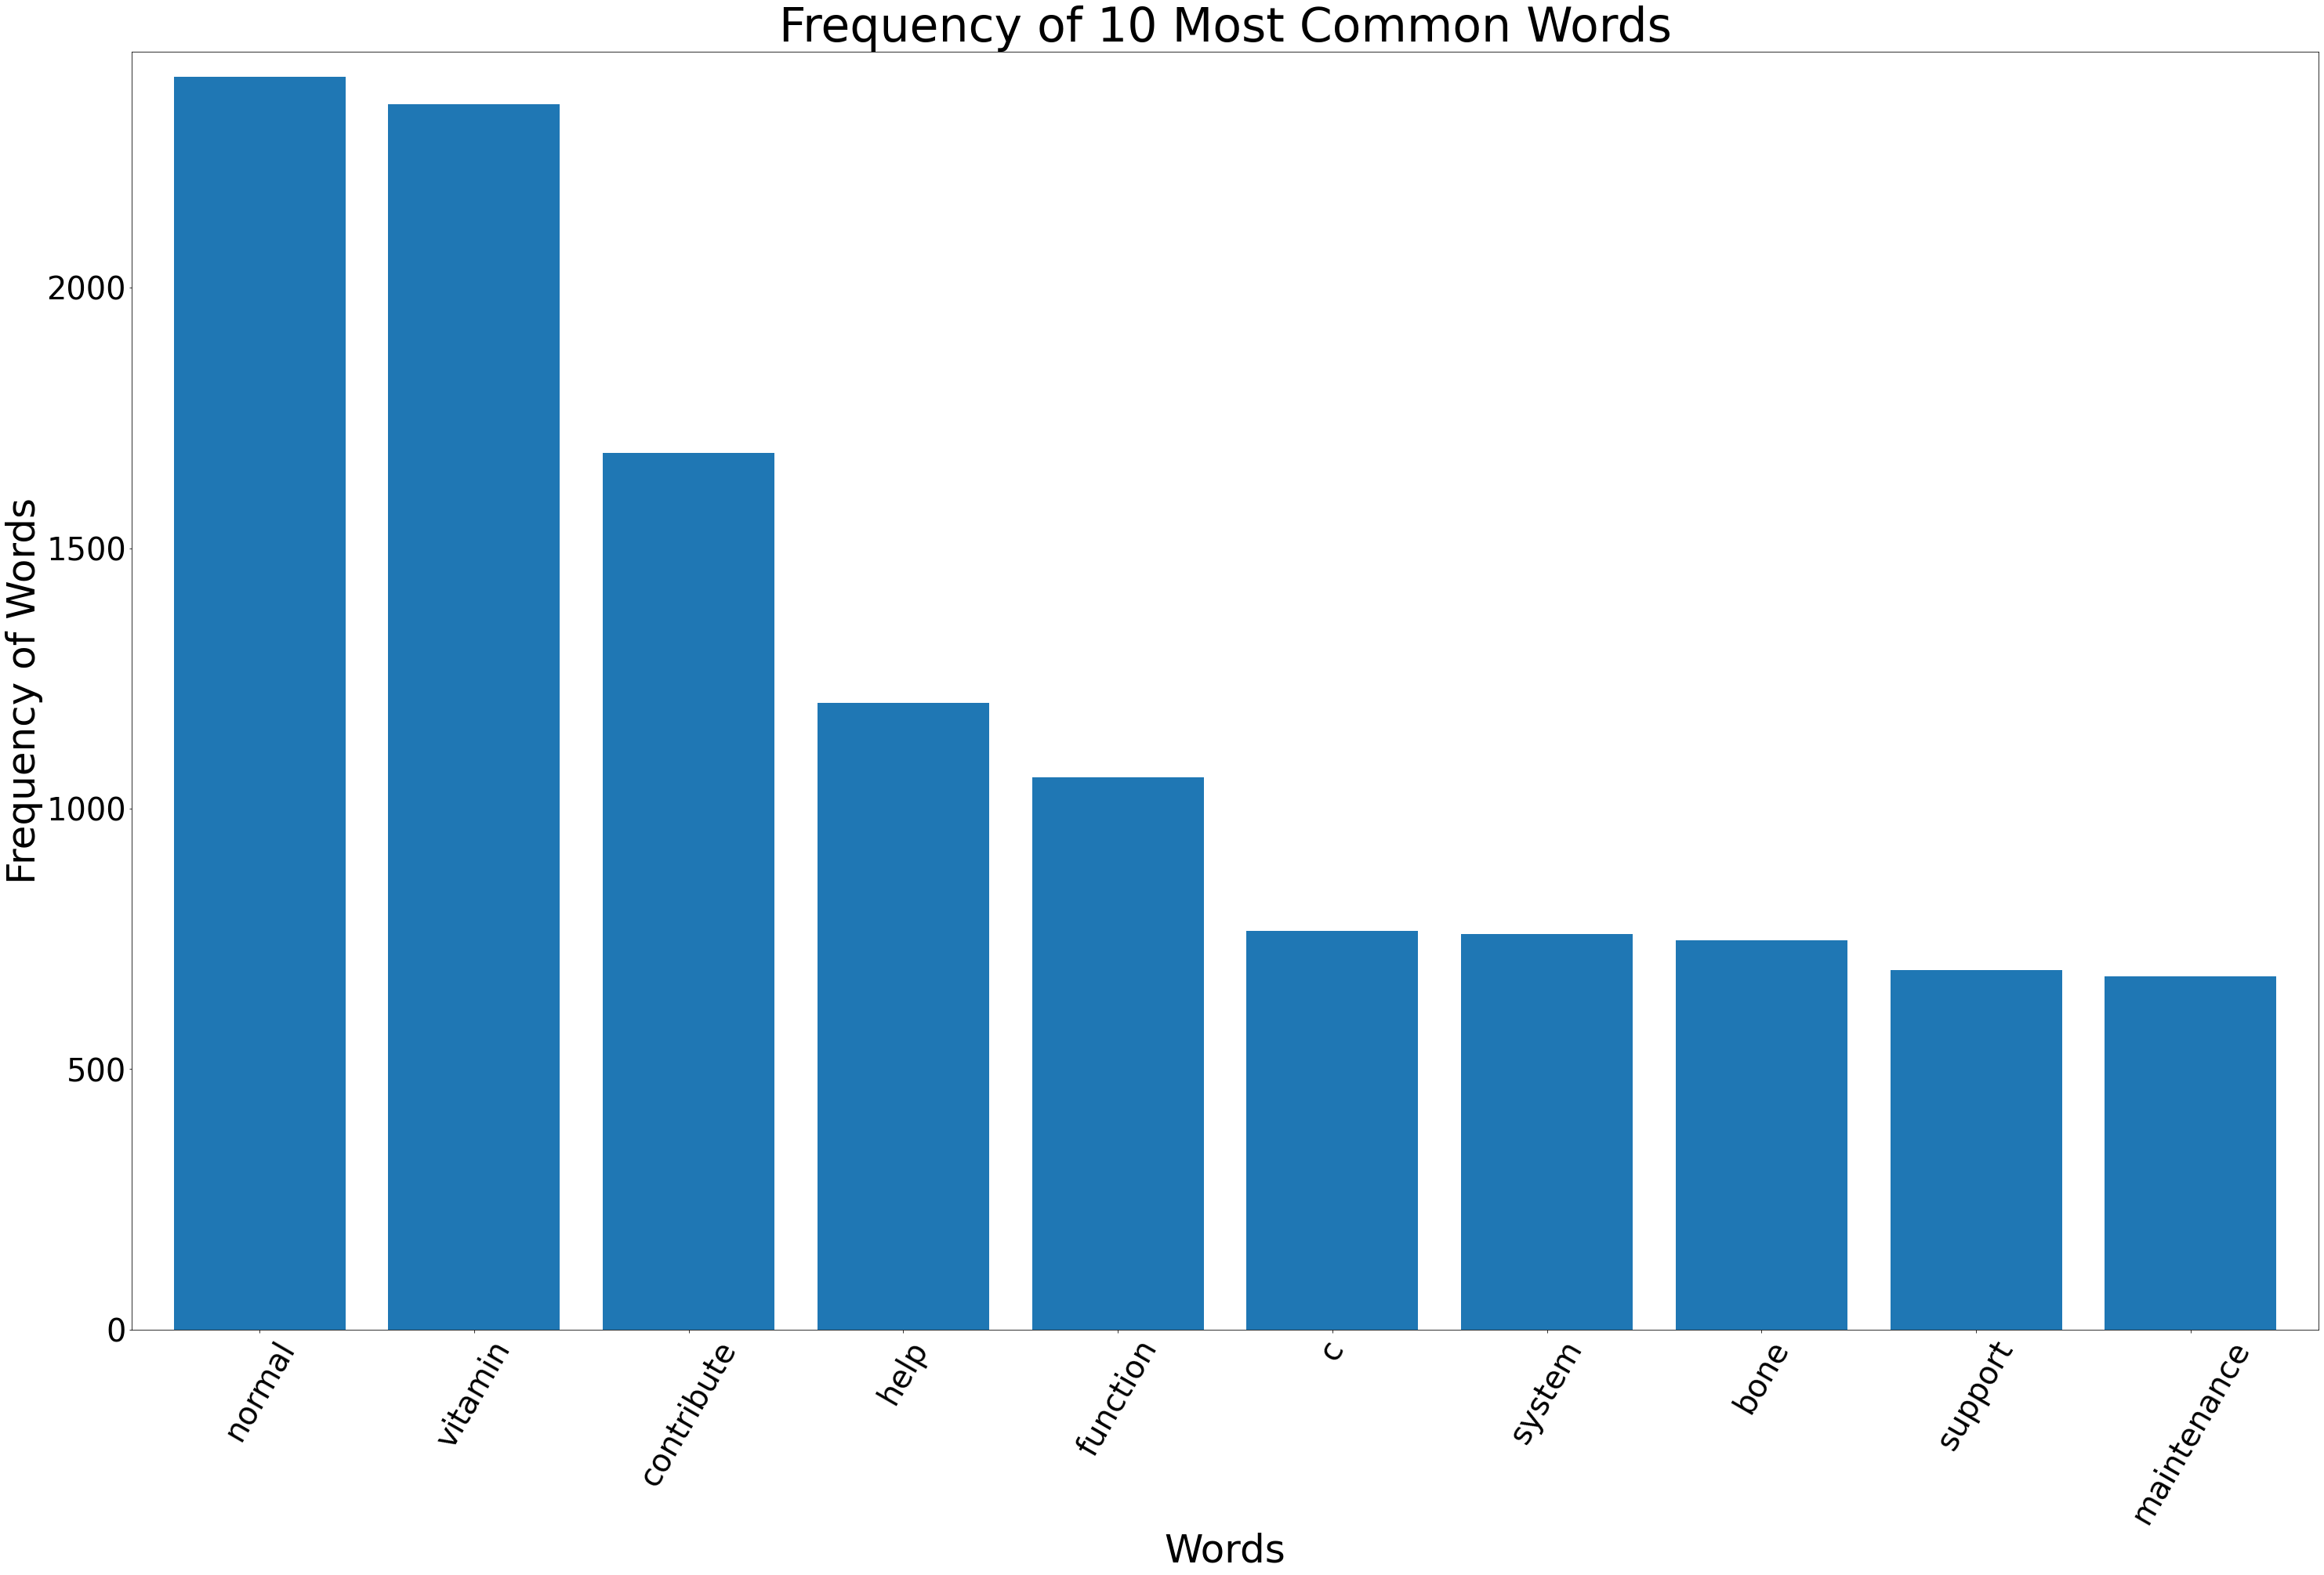

In [36]:
x, y = zip(*mostcommon_word)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 10 Most Common Words', fontsize=60)
plt.savefig('../EDA/top10 word.jpg')
plt.show()

### Word tags with the top 10 frequency

In [37]:
# Get a list of tags
tags = df['tags']
alltags = []
for taglist in tags:
    alltags += taglist


In [38]:
mostcommon_tag = nltk.FreqDist(alltags).most_common(10)
print(mostcommon_tag)

[('NN', 18847), ('JJ', 8160), ('NNS', 3776), ('VBZ', 2197), ('VBP', 1189), ('VB', 1157), ('VBG', 860), ('RB', 643), ('CD', 570), ('VBD', 479)]


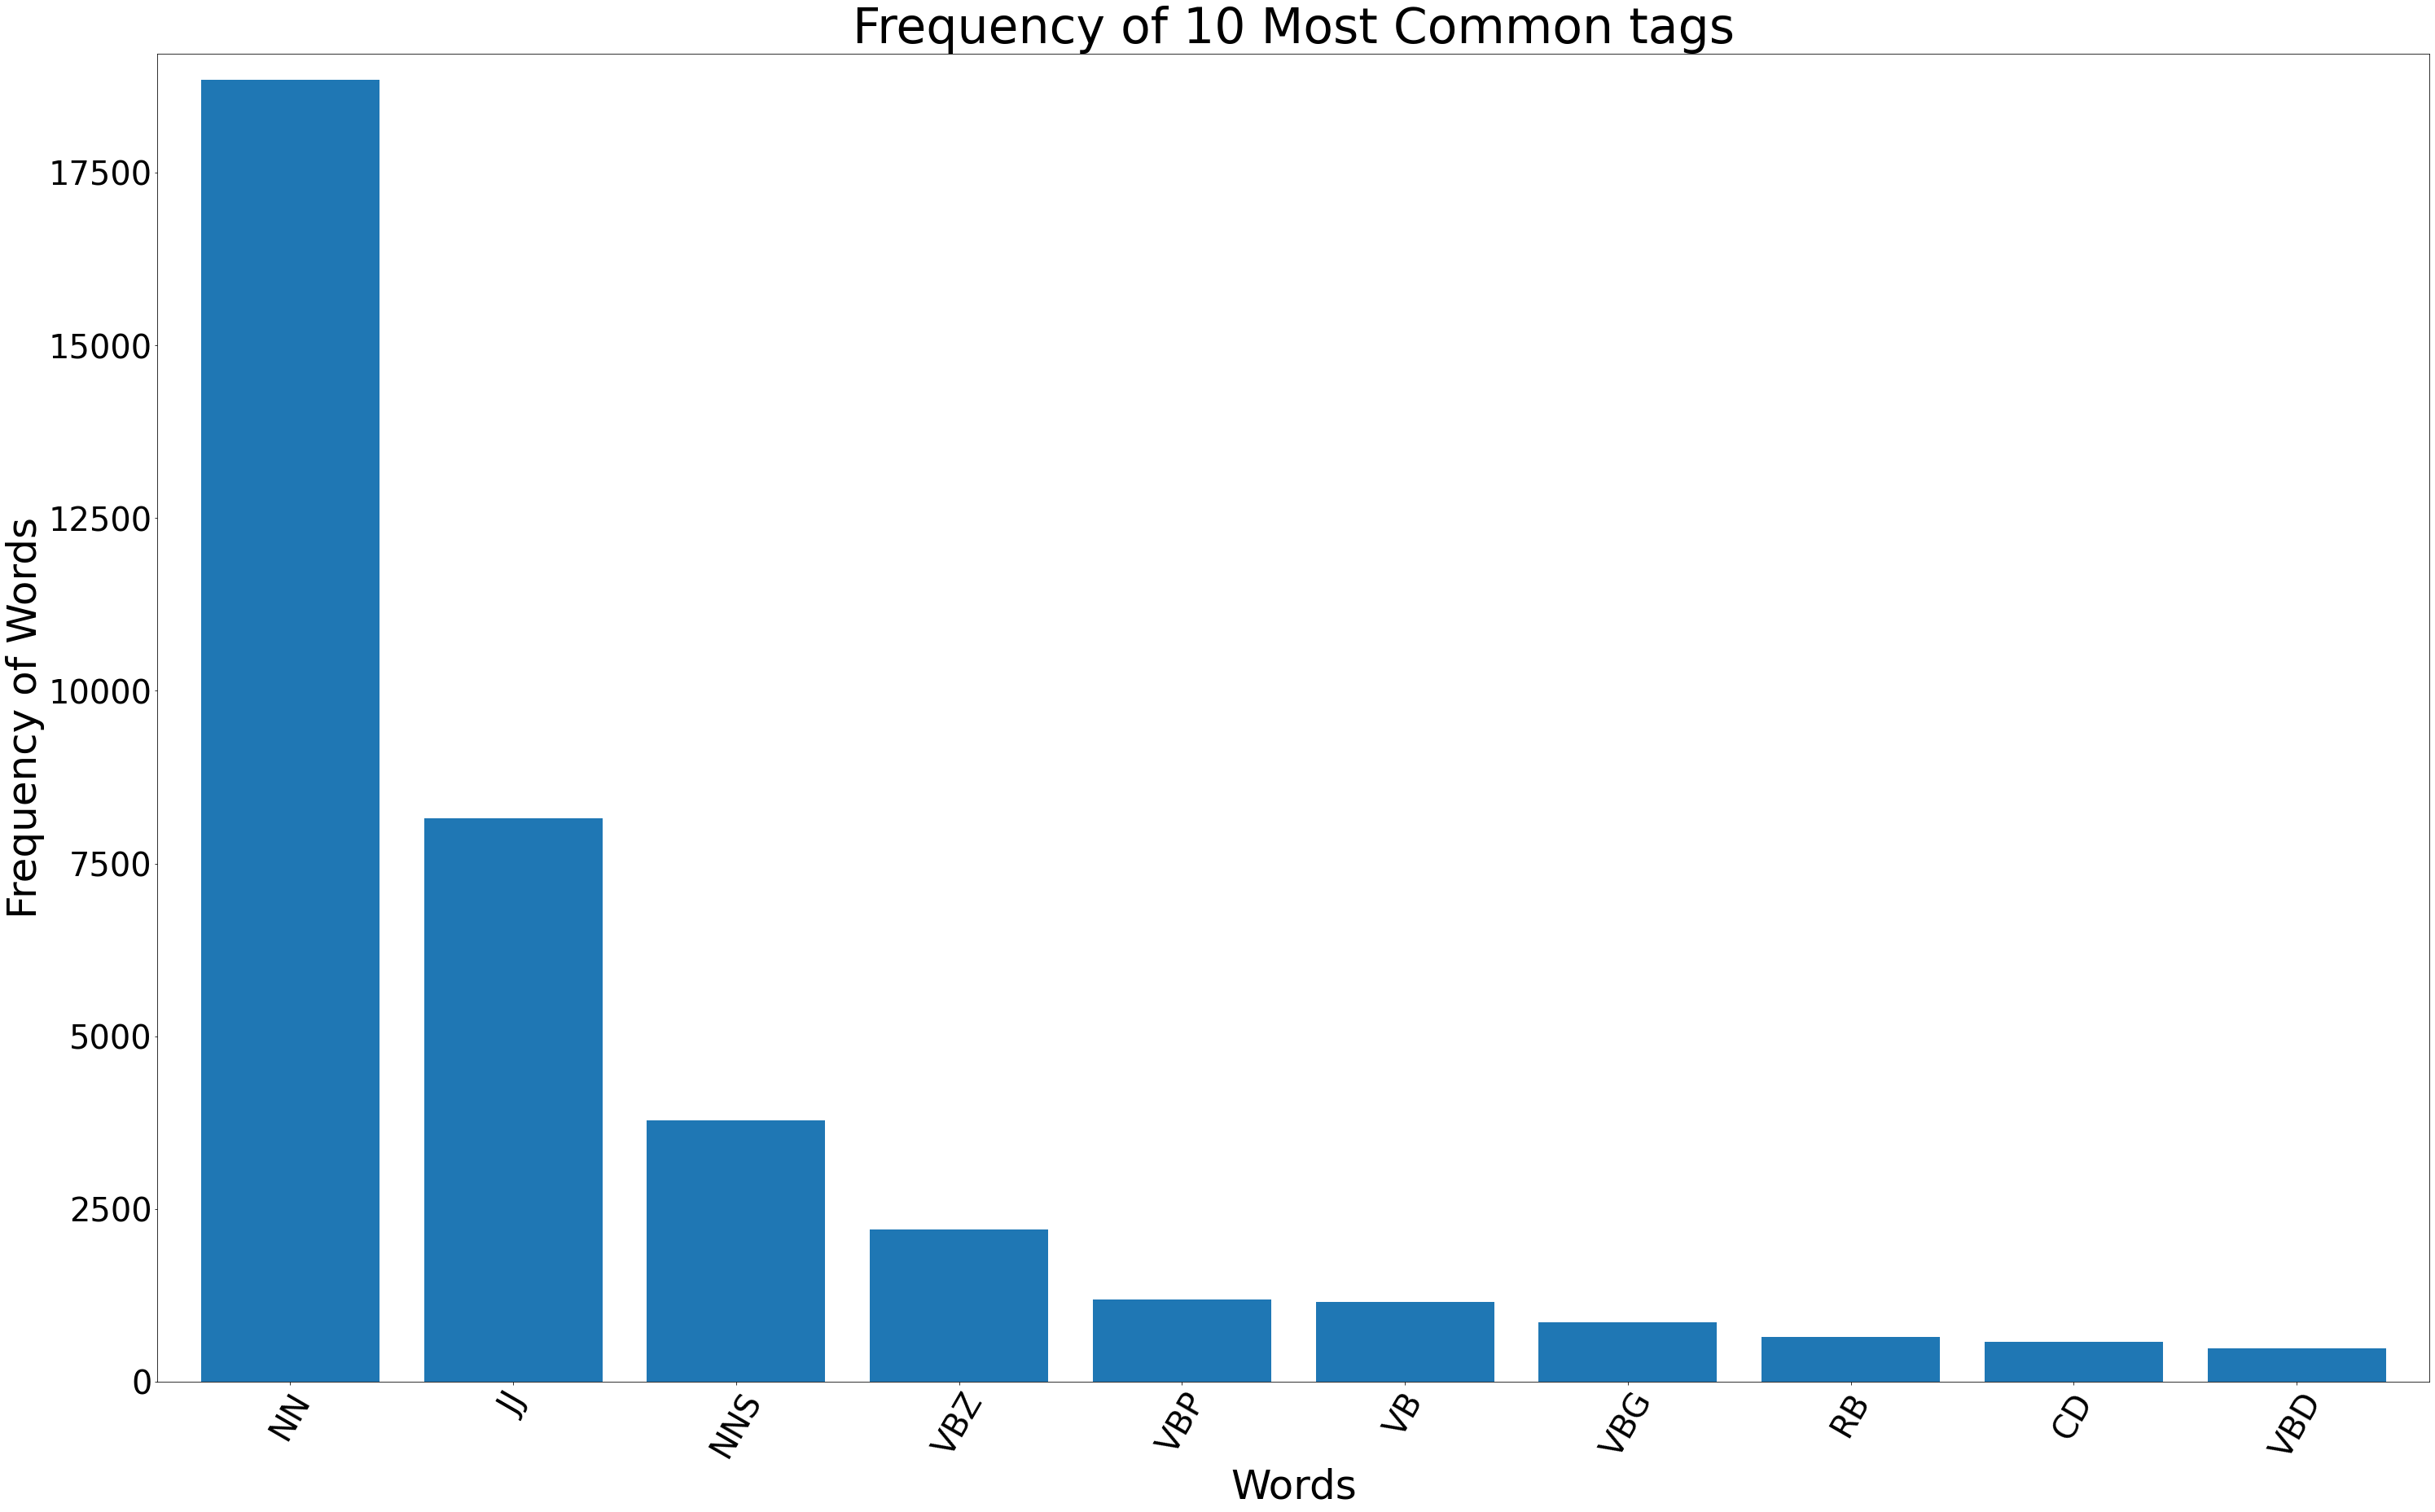

In [39]:
x, y = zip(*mostcommon_tag)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 10 Most Common tags', fontsize=60)
plt.savefig('../EDA/top10 tag.jpg')
plt.show()

In [26]:
t  = df.iloc[0:2,0].values
tags = nltk.pos_tag(word_tokenize(str(t)))
tag_fd = nltk.FreqDist(tag for (word, tag) in tags)
tag_fd


FreqDist({'NN': 4, 'NNP': 4, 'NNS': 3, "''": 2, ':': 2, 'VBZ': 2, 'JJ': 2, 'DT': 1, 'IN': 1, 'POS': 1})